In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# 1. Simulate data
np.random.seed(42)
n = 100
X = np.linspace(0, 10, n)
y = 3 + 2*X + np.random.normal(0, 3, n)

In [3]:
# 2. Fit regression model
X_const = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     473.4
Date:                Fri, 22 Aug 2025   Prob (F-statistic):           2.66e-39
Time:                        18:56:40   Log-Likelihood:                -241.52
No. Observations:                 100   AIC:                             487.0
Df Residuals:                      98   BIC:                             492.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4816      0.543      4.570      0.0

In [4]:
# 3. Create new values to predict
X_new = np.linspace(0, 10, 50)
X_new_const = sm.add_constant(X_new)

In [5]:
# 4. Get predictions with confidence & prediction intervals
predictions = model.get_prediction(X_new_const)
summary_frame = predictions.summary_frame(alpha=0.05)  # 95% intervals

print(summary_frame.head())  # check structure

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  2.481561  0.543053       1.403890       3.559233     -3.053191   
1  2.898170  0.526601       1.853147       3.943192     -2.630319   
2  3.314778  0.510337       2.302031       4.327525     -2.207701   
3  3.731386  0.494279       2.750504       4.712267     -1.785338   
4  4.147994  0.478449       3.198527       5.097461     -1.363231   

   obs_ci_upper  
0      8.016314  
1      8.426658  
2      8.837256  
3      9.248109  
4      9.659219  


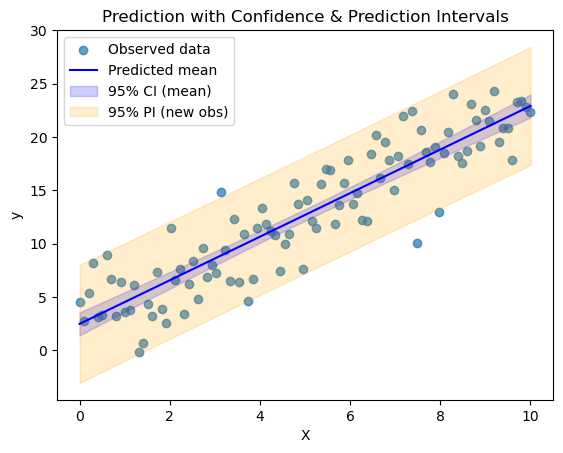

In [6]:
# 5. Visualization
plt.scatter(X, y, label="Observed data", alpha=0.7)
plt.plot(X_new, summary_frame["mean"], color="blue", label="Predicted mean")
plt.fill_between(X_new, summary_frame["mean_ci_lower"], summary_frame["mean_ci_upper"],
                 color="blue", alpha=0.2, label="95% CI (mean)")
plt.fill_between(X_new, summary_frame["obs_ci_lower"], summary_frame["obs_ci_upper"],
                 color="orange", alpha=0.2, label="95% PI (new obs)")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Prediction with Confidence & Prediction Intervals")
plt.show()
